#Psychoacoustics

```
Prof. PhD Joan Salvador Ardid Ramírez
```
###Final Project:  

```
- Background noise level threshold for inteligibility: Cocktail party effect.

This code is intended to generate the .wav files of the sentence + background samples
(after running it you can find and dowload the files in the folder icon on the lateral
 left bar), and analysing the answers acquired.
```

- Generating sentences

In [ ]:
# @title
!pip install gtts
from gtts import gTTS
import os

# List of sentences to transform into speech samples
sentences = [
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"He works at a bank as a teller helping customers",
"The garden flowers are beautiful and come in many colors",
"We are going to the beach tomorrow to swim",
"Do you want a cup of coffee or some tea",
"My favorite color is green because it represents nature",
"She likes to paint landscapes and animals in her free time",
"He is reading a newspaper to stay updated on news",
"The dog is very friendly and loves playing fetch outside"
]

# Save each sentence to a separate .wav file
for i, sentence in enumerate(sentences):
    filename = f'sentence_{i+1}.wav'
    tts = gTTS(sentence)
    tts.save(filename)
    print(f'Saved: {filename}')

Saved: sentence_1.wav
Saved: sentence_2.wav
Saved: sentence_3.wav
Saved: sentence_4.wav
Saved: sentence_5.wav
Saved: sentence_6.wav
Saved: sentence_7.wav
Saved: sentence_8.wav
Saved: sentence_9.wav
Saved: sentence_10.wav
Saved: sentence_11.wav
Saved: sentence_12.wav
Saved: sentence_13.wav
Saved: sentence_14.wav
Saved: sentence_15.wav
Saved: sentence_16.wav
Saved: sentence_17.wav
Saved: sentence_18.wav
Saved: sentence_19.wav
Saved: sentence_20.wav


- Creating the background noise and mixing main sentences

In [ ]:
!pip install pydub --quiet
!apt-get install ffmpeg --quiet
from pydub import AudioSegment
from pydub.exceptions import CouldntDecodeError

# Function to check and re-encode wav files
def verify_reencode(filename):
    try:
        # Try loading the audio file
        audio = AudioSegment.from_wav(filename)
        return audio
    except CouldntDecodeError:
        # If decoding fails, re-encode the file
        print(f"Re-encoding {filename}...")
        temp_filename = f"temp_{filename}"
        os.system(f"ffmpeg -i {filename} -acodec pcm_s16le -ar 44100 {temp_filename}")
        audio = AudioSegment.from_wav(temp_filename)
        os.remove(temp_filename)
        return audio

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# Load and verify the 20 .wav files
filenames = [f'sentence_{i+1}.wav' for i in range(20)]
audio_segments = [verify_reencode(filename) for filename in filenames]

# Loop through each sentence as the main one
for main_sentence_index in range(len(audio_segments)):
    # Set the main sentence
    main_sentence = audio_segments[main_sentence_index].apply_gain(0)

    # set the background and mix
    background_mix = AudioSegment.silent(duration=len(main_sentence))
    #background_sentences = audio_segments[:main_sentence_index] + audio_segments[main_sentence_index+1:]
    for i, background_sentence in enumerate(audio_segments):
        if i != main_sentence_index:
            background_mix = background_mix.overlay(background_sentence.apply_gain(-25 + main_sentence_index))
    mix = main_sentence.overlay(background_mix)

    # Export the combined audio to a file
    output_filename = f'combined_main_{main_sentence_index+1}.wav'
    mix.export(output_filename, format='wav')
    print(f'Saved: {output_filename}')

Re-encoding sentence_1.wav...
Re-encoding sentence_2.wav...
Re-encoding sentence_3.wav...
Re-encoding sentence_4.wav...
Re-encoding sentence_5.wav...
Re-encoding sentence_6.wav...
Re-encoding sentence_7.wav...
Re-encoding sentence_8.wav...
Re-encoding sentence_9.wav...
Re-encoding sentence_10.wav...
Re-encoding sentence_11.wav...
Re-encoding sentence_12.wav...
Re-encoding sentence_13.wav...
Re-encoding sentence_14.wav...
Re-encoding sentence_15.wav...
Re-encoding sentence_16.wav...
Re-encoding sentence_17.wav...
Re-encoding sentence_18.wav...
Re-encoding sentence_19.wav...
Re-encoding sentence_20.wav...
Saved: combined_main_1.wav
Saved: combined_main_2.wav
Saved: combined_main_3.wav
Saved: combined_main_4.wav
Saved: combined_main_5.wav
Saved: combined_main_6.wav
Saved: combined_main_7.wav
Saved: combined_main_8.wav
Saved: combined_main_9.wav
Saved: combined_main_10.wav
Saved: combined_main_11.wav
Saved: combined_main_12.wav
Saved: combined_main_13.wav
Saved: combined_main_14.wav
Saved:

In [ ]:
display(mix) #just an example to check if it worked (last sample)

- Survey Answers

In [ ]:
# @title
samples=[]
samples.append([
"I like to read books, especially mystery and science fiction",
"She had a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working and concentrating",
"She is a good dancer and practices her moves daily",
"He works at a bank as a tailor helping customers",
"The garden flowers are beautiful and come in many colors",
"x",
"x",
"x",
"x",
"x",
"x"
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"He works at a bank as a teller helping customers",
"The garden flowers are beautiful and come in many colors",
"x",
"x",
"x",
"x",
"x",
"x"
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"He works at a bank as a dresser helping customers",
"The garden flowers are beautiful and come in many colors",
"x",
"x",
"x",
"x",
"x",
"x"
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She had a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
'x',
'x',
'x',
'x',
'x',
'x',
'x',
'x'
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She had a red car she drives every day",
"They are planning in the park with their friends",
"The sky is blue today without clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"x",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"x",
"She is a good dancer and practices her moves dancing",
'x',
'x',
'x',
'x',
'x',
'x',
'x',
'x'
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"He works in a bank helping customers",
"The garden flowers are beautiful and come in many colors",
"x",
'x',
'x',
'x',
'x',
'x'
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"He works at a bank as a teller helping customers",
"The garden flowers are beautiful and come in many colors",
"We are going to the beach tomorrow to swim",
'x',
'x',
'x',
'x',
'x'
])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"bank helping customers",
"The garden beautiful many colors",
'x',
'x',
'x',
'x',
'x',
'x',
 ])

In [ ]:
# @title
samples.append([
"I like to read books, especially mystery and science fiction",
"She has a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"He works bank helping customers",
"The garden flowers are beautiful and come in many colors",
"We the beach to swim",
'x',
'x',
'x',
'x',
'x'
])

In [ ]:
samples.append([
"I like to read books, especially mystery and science fiction",
"She had a red car she drives every day",
"They are playing in the park with their friends",
"The sky is blue today with no clouds visible",
"He eats an apple every morning to stay healthy",
"We live in a small town with a beautiful lake",
"The cat is sleeping on the couch after playing outside",
"I need to buy groceries like milk, bread, and vegetables",
"Can you help me with this difficult math problem",
"It is very hot outside, so drink plenty of water",
"I enjoy listening to music while working for concentration",
"She is a good dancer and practices her moves daily",
"x",
"The garden flowers are beautiful and come with colors",
'x',
'x',
'x',
'x',
'x',
'x'
])

- Evaluating the answers

In [ ]:
percent=75 # [%] of the minimum to be considered understood
correct=0
correction=[]
samples_correction=[]

for k in samples:
  aux=0
  for j in k:
    words = j.split(' ')
    for word in words:
      if word in sentences[aux]:
        correct = correct+1
    if (correct/len(words)>=(percent/100)):  #If the sentence is understood (comprehended more than 75% of the words) 0 is returned
      correction.append(0)
    else:
      correction.append(1) #If the sentence is NOT understood (comprehended less than 75% of the words) 1 is returned
    correct=0
    aux=aux+1
  samples_correction.append(correction)
  correction=[]

In [ ]:
#Averaging

avg=[]
sum=[]
aux = 0
for k in range(len(samples[0])): # Iterate over each column (assuming all inner lists are of the same length)
  for j in range(len(samples_correction)):
    aux += samples_correction[j][k] # Compute average for the k-th column
  sum.append(aux)
  avg.append(aux/len(samples))
  aux=0 # Reset aux for the next column

print(avg)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.3, 0.2, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0]


- Fitting psychometric curve (Sigmoid)

Text(0.5, 1.0, 'Model 75%')

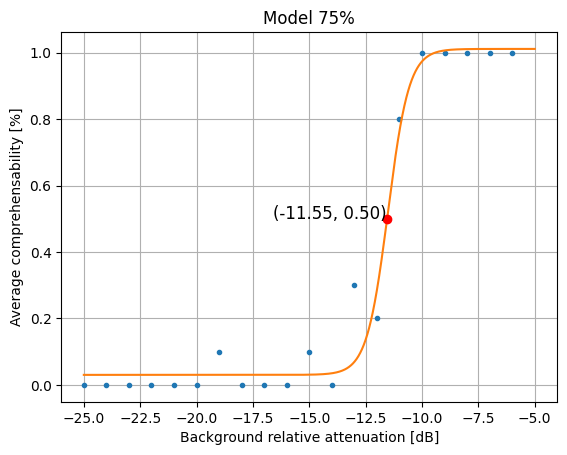

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

gains = range(-25,(-5),1)

p0 = [max(avg), np.median(gains),1,min(avg)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, gains, avg, p0, method='lm') #Fitting the curve
xaxis = np.linspace(-25,-5, 2000)
psychometric = sigmoid(xaxis, *popt)

# Calculate the x value where the sigmoid curve equals 0.5
L, x0, k, b = popt
x_threshold = x0 - (1 / k) * np.log((L / (0.5 - b)) - 1)
y_point = sigmoid(x_threshold, *popt)

plt.figure()
plt.plot(gains,avg, '.')
plt.plot(xaxis,psychometric)
plt.xlabel("Background relative attenuation [dB]")
plt.ylabel('Average comprehensability [%]')
plt.grid()
plt.plot(x_threshold, y_point, 'ro')  # 'ro' indicates a red dot
plt.text(x_threshold, y_point, f'({x_threshold:.2f}, {y_point:.2f})', fontsize=12, ha='right')
plt.title(f'Model {percent}%')